In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import numpy as np
%matplotlib inline


In [2]:
# import Net Immigration Migration (NIM) data
nim_long_df = pd.read_csv("nim_data_2017_2060.csv")

# display data
nim_long_df.tail()

,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_0,NIM_1,NIM_2,NIM_3,NIM_4,NIM_5,...,NIM_76,NIM_77,NIM_78,NIM_79,NIM_80,NIM_81,NIM_82,NIM_83,NIM_84,NIM_85
1315,9,2,2056,110859,2189,1969,1828,1632,1363,1201,...,-160,-131,-111,-96,-114,-167,-241,-332,-428,-4881
1316,9,2,2057,111134,2199,1979,1838,1640,1370,1208,...,-162,-146,-119,-103,-124,-165,-254,-333,-415,-4913
1317,9,2,2058,111405,2207,1987,1845,1647,1377,1213,...,-166,-146,-131,-109,-129,-175,-251,-350,-416,-4923
1318,9,2,2059,111663,2217,1997,1854,1655,1382,1218,...,-169,-151,-131,-122,-137,-182,-264,-347,-434,-4936
1319,9,2,2060,111915,2225,2005,1861,1662,1387,1223,...,-166,-154,-134,-125,-149,-190,-272,-364,-431,-4965


In [3]:
# remove unnecessary columns
nim_long_df = nim_long_df[['RACE_HISP','SEX','YEAR','TOTAL_NIM']]
nim_long_df.tail()

,RACE_HISP,SEX,YEAR,TOTAL_NIM
1315,9,2,2056,110859
1316,9,2,2057,111134
1317,9,2,2058,111405
1318,9,2,2059,111663
1319,9,2,2060,111915


In [4]:
# filter data to show total NIM data for both males and females together. In census NIM dataset, 
# sex == 0 is for both sexes. sex == 1 is for males and sex == 2 is for females.
nim_short_df = nim_long_df.loc[(nim_long_df['RACE_HISP'] == 0) & (nim_long_df['SEX'] == 0),:]
nim_short_df.head()

,RACE_HISP,SEX,YEAR,TOTAL_NIM
0,0,0,2017,996800
1,0,0,2018,1001528
2,0,0,2019,1005801
3,0,0,2020,1009861
4,0,0,2021,1013839


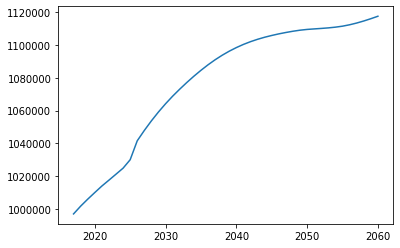

In [5]:
# assign x and y values to prepare to plot graph
year = nim_short_df['YEAR']
nim = nim_short_df['TOTAL_NIM']

# plot data using line graph
ax, fig = plt.subplots()
plt.plot(year, nim)
#tick_locations = np.arange(len(year))
#plt.xticks(tick_locations, nim_short_df['YEAR'], rotation=90)


The r-squared is: 0.936023542745225


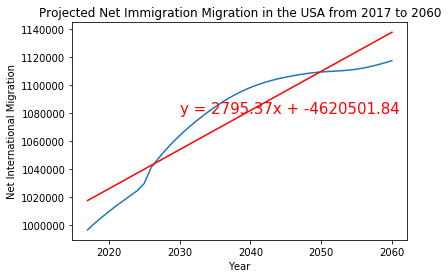

In [6]:
# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(year, nim)
regress_values = year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(year, nim)
plt.plot(year,regress_values,"r-")
plt.annotate(line_eq,(2030,1080000),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Net International Migration')
plt.title('Projected Net Immigration Migration in the USA from 2017 to 2060')
print(f"The r-squared is: {rvalue}")

# show plot
plt.show()

In [22]:
# create dataframe
nim_short_df = pd.DataFrame(nim_short_df)

# create new column with low NIM projected rates by freezing real-time 
# 2019 NIM rates of 595,348 for all years from 2019 to 2060. NIM rates for 
# before 2019 to be the same as historical rates. 
nim_short_df['NIM_LOW'] = np.where(nim_short_df['YEAR']>2018, 595348, nim_short_df['TOTAL_NIM'])
nim_short_df.head()


,RACE_HISP,SEX,YEAR,TOTAL_NIM,NIM_LOW
0,0,0,2017,996800,996800
1,0,0,2018,1001528,1001528
2,0,0,2019,1005801,595348
3,0,0,2020,1009861,595348
4,0,0,2021,1013839,595348


Text(0.5, 1.0, 'Low NIM Scenario: NIM capped at 2019 levels')

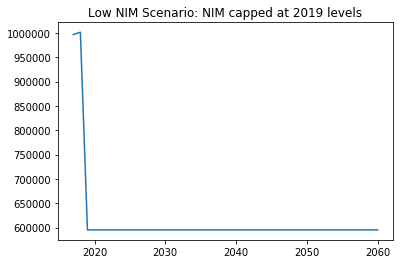

In [23]:
# plot with low NIM
plt.plot(year,nim_short_df['NIM_LOW'])
plt.title('Low NIM Scenario: NIM capped at 2019 levels')
